In [1]:
!pip install pmdarima

In [1]:
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [5]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/American_Airlines.xlsx')

In [6]:
df_american.head()

,Year,Month,date,flight_domestic,flight_int,pax_count,revenue,seat_miles,load_factor,flights
0,2002,10,2002 10,"6,483,209","1,268,032","7,751,241","9,981,313","14,558,503",68.56,"83,649"
1,2002,11,2002 11,"5,836,804","1,248,937","7,085,741","9,102,300","13,472,175",67.56,"77,398"
2,2002,12,2002 12,"6,473,000","1,428,359","7,901,359","10,351,711","14,119,643",73.31,"79,962"
3,2002,TOTAL,2002 TOTAL,"77,435,542","16,564,424","93,999,966","121,504,345","171,711,646",70.76,"990,931"
4,2003,1,2003 1,"5,659,172","1,354,646","7,013,818","9,405,547","14,038,698",67.00,"78,214"


## Delete irrelevant data / years / months 

#### Delete irrelevant date

In [7]:
indexNames = df_american[df_american['Year'] == 2002].index
df_american.drop(indexNames , inplace=True)


In [8]:
indexNames = df_american[df_american['Year'] == 2020].index
df_american.drop(indexNames , inplace=True)

In [9]:
indexNames = df_american[df_american['Year'] == 2021].index
df_american.drop(indexNames , inplace=True)

In [10]:
indexNames = df_american[df_american['Year'] == 2022].index
df_american.drop(indexNames , inplace=True)

In [11]:
print(df_american)

     Year  Month        date flight_domestic  flight_int    pax_count  \
4    2003      1      2003 1       5,659,172   1,354,646    7,013,818   
5    2003      2      2003 2       5,224,456   1,139,470    6,363,926   
6    2003      3      2003 3       6,307,672   1,320,809    7,628,481   
7    2003      4      2003 4       5,905,978   1,197,107    7,103,085   
8    2003      5      2003 5       6,217,128   1,230,334    7,447,462   
..    ...    ...         ...             ...         ...          ...   
220  2019      9      2019 9       9,967,442   2,239,025   12,206,467   
221  2019     10     2019 10      10,783,388   2,292,466   13,075,854   
222  2019     11     2019 11      10,206,878   2,057,374   12,264,252   
223  2019     12     2019 12      10,960,472   2,440,847   13,401,319   
224  2019  TOTAL  2019 TOTAL     126,030,910  29,751,701  155,782,611   

         revenue   seat_miles  load_factor    flights  
4      9,405,547   14,038,698        67.00     78,214  
5      8,35

#### Delete irrelevant content

In [12]:
indexNames = df_american[df_american['Month'] == 'TOTAL'].index
df_american.drop(indexNames , inplace=True)

In [13]:
df_american.head(20)

,Year,Month,date,flight_domestic,flight_int,pax_count,revenue,seat_miles,load_factor,flights
4,2003,1,2003 1,"5,659,172","1,354,646","7,013,818","9,405,547","14,038,698",67.00,"78,214"
5,2003,2,2003 2,"5,224,456","1,139,470","6,363,926","8,355,084","12,142,241",68.81,"67,463"
6,2003,3,2003 3,"6,307,672","1,320,809","7,628,481","9,981,627","13,929,984",71.66,"77,125"
7,2003,4,2003 4,"5,905,978","1,197,107","7,103,085","9,325,622","13,210,596",70.59,"73,182"
8,2003,5,2003 5,"6,217,128","1,230,334","7,447,462","9,838,460","13,345,197",73.72,"73,381"
9,2003,6,2003 6,"6,547,986","1,443,436","7,991,422","10,853,896","13,757,115",78.90,"73,643"
10,2003,7,2003 7,"7,007,137","1,735,273","8,742,410","11,959,953","14,757,282",81.04,"77,892"
11,2003,8,2003 8,"6,696,062","1,728,088","8,424,150","11,676,743","14,662,709",79.64,"77,131"
12,2003,9,2003 9,"5,268,120","1,244,953","6,513,073","8,996,800","13,461,035",66.84,"71,251"
13,2003,10,2003 10,"5,999,944","1,273,217","7,273,161","9,812,839","13,964,015",70.27,"74,234"


#### Delete irrelevant column

In [14]:
df_american = df_american.drop(["flight_domestic", "flight_int", 'Year', 'Month'], axis=1)

#### Delete NaN

In [15]:
incomplete_columns = list(df_american.columns[df_american.isnull().any()])

In [16]:
incomplete_columns

[]

#### Datensatz ist vollständig

## Convert argument to datetime

In [17]:
df_american['date'] = pd.to_datetime(df_american['date'])

In [18]:
df_american.head()

,date,pax_count,revenue,seat_miles,load_factor,flights
4,2003-01-01,"7,013,818","9,405,547","14,038,698",67.00,"78,214"
5,2003-02-01,"6,363,926","8,355,084","12,142,241",68.81,"67,463"
6,2003-03-01,"7,628,481","9,981,627","13,929,984",71.66,"77,125"
7,2003-04-01,"7,103,085","9,325,622","13,210,596",70.59,"73,182"
8,2003-05-01,"7,447,462","9,838,460","13,345,197",73.72,"73,381"


## Convert data types

In [19]:
df_american.dtypes

date           datetime64[ns]
pax_count              object
revenue                object
seat_miles             object
load_factor           float64
flights                object
dtype: object

In [20]:
df_american['pax_count'] = df_american['pax_count'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_3244/1319109083.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_american['pax_count'] = df_american['pax_count'].str.replace('[^\w\s]','').astype(int)


In [21]:
df_american['revenue'] = df_american['revenue'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_3244/2518242079.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_american['revenue'] = df_american['revenue'].str.replace('[^\w\s]','').astype(int)


In [22]:
df_american['seat_miles'] = df_american['seat_miles'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_3244/2597891616.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_american['seat_miles'] = df_american['seat_miles'].str.replace('[^\w\s]','').astype(int)


In [23]:
df_american['flights'] = df_american['flights'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_3244/4142843975.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_american['flights'] = df_american['flights'].str.replace('[^\w\s]','').astype(int)


In [24]:
df_american.head()

,date,pax_count,revenue,seat_miles,load_factor,flights
4,2003-01-01,7013818,9405547,14038698,67.00,78214
5,2003-02-01,6363926,8355084,12142241,68.81,67463
6,2003-03-01,7628481,9981627,13929984,71.66,77125
7,2003-04-01,7103085,9325622,13210596,70.59,73182
8,2003-05-01,7447462,9838460,13345197,73.72,73381


In [25]:
df_american.dtypes

date           datetime64[ns]
pax_count               int64
revenue                 int64
seat_miles              int64
load_factor           float64
flights                 int64
dtype: object

## Date to Index

In [26]:
df_american = df_american.set_index(['date'])

In [31]:
df_american.head()

,pax_count,revenue,seat_miles,load_factor,flights
date,,,,,
2003-01-01,7013818,9405547,14038698,67.00,78214
2003-02-01,6363926,8355084,12142241,68.81,67463
2003-03-01,7628481,9981627,13929984,71.66,77125
2003-04-01,7103085,9325622,13210596,70.59,73182
2003-05-01,7447462,9838460,13345197,73.72,73381


## Clean data safe 

In [29]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Clean_Data/American Airlines

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Clean_Data/American Airlines


In [30]:
df_american.to_excel('df_american_clean.xlsx', index = True)

## Generating rolling means and standard deviations

### Rolling mean

In [28]:
df_american['pax_count_rolling_mean'] = df_american['pax_count'].rolling(12).mean()

### Rolling std

In [29]:
df_american['pax_count_rolling_std'] = df_american['pax_count'].rolling(12).std()

### Plot

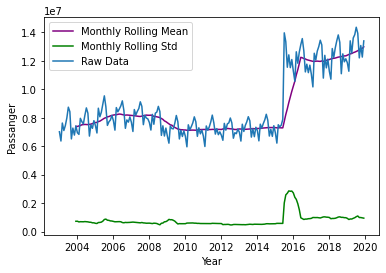

In [30]:
plt.plot(df_american['pax_count_rolling_mean'], label = 'Monthly Rolling Mean', color = 'purple')
plt.plot(df_american['pax_count_rolling_std'], label = 'Monthly Rolling Std', color = 'green')
plt.plot(df_american['pax_count'], label='Raw Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Passanger')
plt.show()

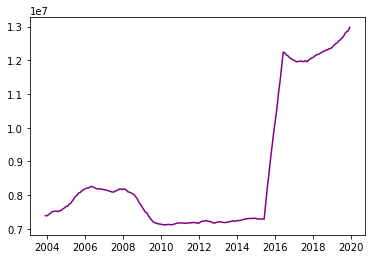

In [31]:
plt.plot(df_american['pax_count_rolling_mean'], label = 'Monthly Rolling Mean', color = 'purple')

## Seasonal decompose

In [32]:
result=seasonal_decompose(df_american['pax_count'], model='multiplicable', period=12)

<AxesSubplot:xlabel='date'>

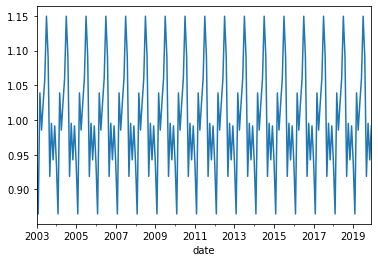

In [33]:
result.seasonal.plot()

<AxesSubplot:xlabel='date'>

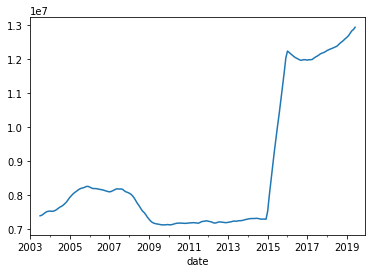

In [34]:
result.trend.plot()

<AxesSubplot:xlabel='date'>

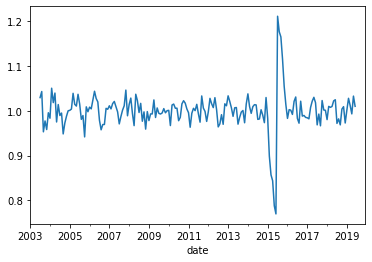

In [35]:
result.resid.plot()

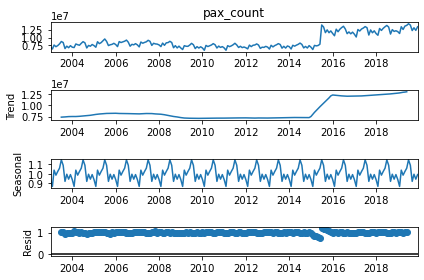

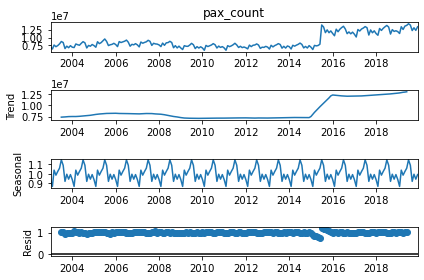

In [36]:
result.plot()

In [37]:
X = df_american['pax_count']
size = int(len(X) * 0.8)
training_set, test_set = X[0:size], X[size:len(X)]
test_set.head(10)

date
2016-08-01    12704813
2016-09-01    11220742
2016-10-01    11764077
2016-11-01    11169788
2016-12-01    11695734
2017-01-01    11051300
2017-02-01    10167600
2017-03-01    12532952
2017-04-01    12059664
2017-05-01    12682795
Name: pax_count, dtype: int64

In [38]:
training_set.tail(10)

date
2015-10-01    12419858
2015-11-01    11520798
2015-12-01    12091996
2016-01-01    11281553
2016-02-01    10561759
2016-03-01    12635859
2016-04-01    11830169
2016-05-01    12614397
2016-06-01    13146977
2016-07-01    13563881
Name: pax_count, dtype: int64

<AxesSubplot:xlabel='date'>

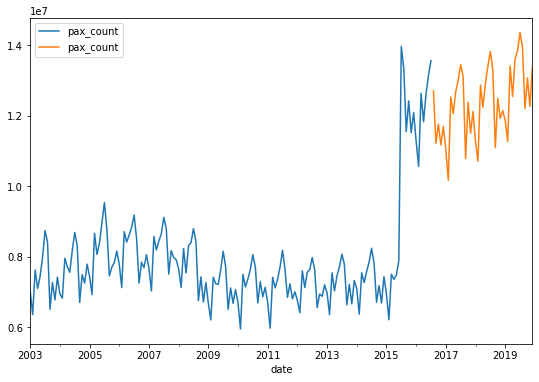

In [39]:
training_set.plot(figsize = (9,6), legend = True)
test_set.plot(legend = True)